In [230]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns


In [231]:
train_df = pd.read_csv("/Users/pranavprajapati/Downloads/zillow-prize-1/train_2016_v2.csv")

prop_df = pd.read_csv("/Users/pranavprajapati/Downloads/zillow-prize-1/properties_2016.csv")
samp = pd.read_csv("/Users/pranavprajapati/Downloads/zillow-prize-1/sample_submission.csv")


/Users/pranavprajapati/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


print(train_df.columns)
print(prop_df.columns)
print(train_df.shape)
print(prop_df.shape)

First, let us merge both these columns based on their '**parcel_id**' and then we can perform our analysis.

In [232]:
train_df = pd.merge(train_df, prop_df, on='parcelid', how='left')

In [233]:
#train_df['logerror']

***1. COLUMNS WITH NON-VARIANCE***

We have quite a lot of columns. Let us see if any of them have only **ONE distinct** value, so that they can be dropped.

In [234]:
count = 0
for c in list(train_df):
    if (len(train_df[c].unique()) == 1):
        print(c)
        count+=1
print(count)

assessmentyear
1


Let us see if there are any columns having less than 1% of unique values.

In [235]:
count = 0
low_var_cols = []
for c in list(train_df):
    if (len(train_df[c].unique()) < 907):
        #print(c)
        low_var_cols.append(c)
        count+=1
print(count)

43


There are 43 such columns. Out of this we can drop columns which have only two unique values as either of these values would be less than 1%, hence such columns would have less variance. (we can think about dropping them later)

In [236]:
len(low_var_cols)

43

In [237]:
count = 0
low_var_drop_cols = []
for c in low_var_cols:
    if (train_df[c].nunique() <= 2):
        #print(c)
        low_var_drop_cols.append(c)
        count+=1
print(count)
len(low_var_drop_cols)

11


11

The column `assessmentyear` alone has one unique variable throughout. All the other columns have some unique features which can considerably vary the cost. Hence, we will not drop those columns for now.

Only **ONE** column '**assessmentyear**' has a single distinct value throughout. We can cross check that:

In [238]:
print(train_df['assessmentyear'].nunique())

1


***2. COLUMNS WITH MISSING VALUES***

In [239]:
#--- List of columns having Nan values and the number ---

missing_col = train_df.columns[train_df.isnull().any()].tolist()
# print(missing_col)
print('There are {} missing columns'.format(len(missing_col)))

There are 47 missing columns


***3. COLUMNS WITH NO MISSING VALUES***

In [240]:
nonmissing_col = train_df.columns[~(train_df.isnull().any())].tolist()
print(nonmissing_col)
print('There are {} non-missing columns'.format(len(nonmissing_col)))

['parcelid', 'logerror', 'transactiondate', 'bathroomcnt', 'bedroomcnt', 'fips', 'latitude', 'longitude', 'propertylandusetypeid', 'rawcensustractandblock', 'regionidcounty', 'roomcnt', 'assessmentyear']
There are 13 non-missing columns


There are 13 columns that have no missing values. Every other column has some missing values.


***4. CHECKING DATATYPE OF EACH COLUMN ***

In [241]:
#--- Data type of each column ---
#print(train_df.dtypes)

What is the exact count of all these datatypes?

In [242]:
print(train_df.dtypes.value_counts())

float64    53
object      6
int64       1
dtype: int64


Observations:
1. Only '**parcel_id**' is off **integer** type
2. '**hashottuborspa**', '**propertycountylandusecode**', '**propertyzoningdesc**', '**fireplaceflag**' and '**taxdelinquencyflag** are of type **object**
3. The remaining columns are of type **float**.

***5.1 Analyzing column of type `int` -> `parcelid`***

In [243]:
#--- Checking if all the parcelids are unique in both the dataframes ---

print (prop_df['parcelid'].nunique())
print (prop_df.shape[0])

print (train_df['parcelid'].nunique())
print (train_df.shape[0]) 


2985217
2985217
90150
90275


Some of the parcelid in the merged dataframe have been repeated more than once.

***5.2 Analyzing columns of type `object`***

Let us get the unique elements in each of these columns (categorical variables) along with their count. Then we can convert them to numerical variables:

In [244]:
print(train_df['hashottuborspa'].nunique())
print(train_df['hashottuborspa'].unique())
print('\n')
print(train_df['propertycountylandusecode'].nunique())
print(train_df['propertycountylandusecode'].unique())
print('\n')
print(train_df['propertyzoningdesc'].nunique())
print(train_df['propertyzoningdesc'].unique())
print('\n')
print(train_df['fireplaceflag'].nunique())
print(train_df['fireplaceflag'].unique())
print('\n')
print(train_df['taxdelinquencyflag'].nunique())
print(train_df['taxdelinquencyflag'].unique()) 
print('\n') 
print(train_df['transactiondate'].nunique())


1
[nan True]


77
['0100' '1' '010C' '122' '1129' '34' '1128' '010E' '0104' '0101' '0200'
 '0700' '1111' '01DC' '010D' '1110' '0400' '012C' '010V' '1116' '01HC'
 '010G' '0300' '010F' '1117' '0103' '38' '1210' '0111' '010M' '96' '135'
 '0108' '1014' '1112' '0201' '0109' '1310' '010H' '1410' '1222' '1321'
 '1720' '1011' '1432' '0401' '0102' '012D' '73' '105' '0110' '100V' '0130'
 '8800' '0303' '0210' '1012' '1333' '0114' '01DD' '020G' '040A' '012E'
 '020M' '040V' '070D' '1200' '030G' '1722' '6050' '1421' '010' nan '200'
 '0' '1420' '0131' '0301']


1996
['LARS' nan 'PSR6' ... 'SHCG' 'COR2YY' 'LNR2RPD-R3']


1
[nan True]


1
[nan 'Y']


352


Three of the columns mentioned above (**hashottuborspa**, **fireplaceflag** and **taxdelinquencyflag**) are merely **flags** indicating presence of the feature or not. Hence the `nan` values can be replaced with '0', while the other values can be replaced with '1'.

In [245]:
train_df['hashottuborspa'] = train_df['hashottuborspa'].fillna(0)
train_df['fireplaceflag'] = train_df['fireplaceflag'].fillna(0)
train_df['taxdelinquencyflag'] = train_df['taxdelinquencyflag'].fillna(0)

#---  replace the string 'True' and 'Y' with value '1' ---

train_df.hashottuborspa = train_df.hashottuborspa.astype(np.int8)
train_df.fireplaceflag = train_df.fireplaceflag.astype(np.int8)
train_df['taxdelinquencyflag'].replace( 'Y', 1, inplace=True)
train_df.taxdelinquencyflag = train_df.taxdelinquencyflag.astype(np.int8)

Out of the remaining three columns `transactiondate` is a datetime object

In [246]:
train_df['transactiondate'] = pd.to_datetime(train_df['transactiondate'])

#--- Creating two additional columns each for the month and day ---
train_df['transaction_month'] = train_df.transactiondate.dt.month.astype(np.int64)
train_df['transaction_day'] = train_df.transactiondate.dt.weekday.astype(np.int64)

#--- Dropping the 'transactiondate' column now ---
train_df = train_df.drop('transactiondate', 1)

The remaining two columns are random in nature, in terms of their values `propertycountylandusecode` and `propertyzoningdesc`

In [247]:
#--- Counting number of occurrences of Nan values in remaining two columns ---
print(train_df['propertycountylandusecode'].isnull().sum())
print(train_df['propertyzoningdesc'].isnull().sum())

1
31962


The occurrences of missing values for the second column (`propertyzoningdesc`) is so large for us to remove the observations. So we will replace them with a **random** value.

In [248]:
#--- Since there is only ONE missing value in this column we will replace it manually ---
train_df["propertycountylandusecode"].fillna('023A', inplace =True)
print(train_df['propertycountylandusecode'].isnull().sum())

0


In [249]:
train_df["propertyzoningdesc"].fillna('UNIQUE', inplace =True)
print(train_df['propertyzoningdesc'].isnull().sum())

0


I have assigned same code `UNIQUE` for all the missing observations. If it does impact our modeling we can always change it.

***5.3 Analyzing columns of type `float`***

   ***5.3.1 Firstly, the target variable `logerror`. ***
   
   Let us see the statistics of this column and then plot it.

In [250]:
#--- Statistics of the target variable ---

print(train_df['logerror'].describe())

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64


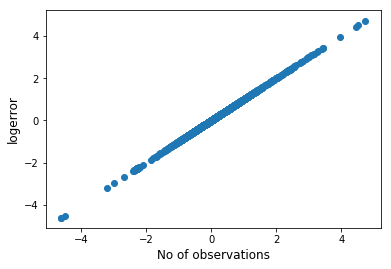

In [251]:
import matplotlib.pyplot as plt
plt.scatter(train_df['logerror'], train_df.logerror.values)
plt.xlabel('No of observations', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

Most of the values lie in the range [**-1.75 - 3.75**] (approx)

First I would like to take all columns of type `float` in a list

In [252]:
#--- putting all columns of 'float' type in a list ---
float_cols = list(train_df.select_dtypes(include=['float']).columns)
print('There are {} columns of type float having missing values'.format(len(float_cols)))
print('\n')
#print(float_cols)

There are 53 columns of type float having missing values




Now collect all columns of type `float` and **missing** values in a list

In [253]:
#--- putting columns of type 'float' having missing values in a list ---
float_nan_col = []
for column in float_cols:
    if (train_df[column].isnull().sum() > 0):
        float_nan_col.append(column)

print('There are {} columns of type float having missing values'.format(len(float_nan_col)))
print('\n')
#print(float_nan_col)

There are 42 columns of type float having missing values




In [254]:
float_nan_col

['airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'heatingorsystemtypeid',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'regionidcity',
 'regionidneighborhood',
 'regionidzip',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'taxdelinquencyyear',
 'censustractandblock']

***5.3.2*** Analysis must be done on **THESE** 42 columns to impute missing values** with** care:

a. Columns **`regionidcity`, `regionidneighborhood`** and **`regionidzip`** can be given some random values based on the other values in the respective columns.

b. Missing values in column **`unitcnt`** must be assigned value **1**, signifying a single structural unit. Making it '0' would be absurd!!!

c. Column **`censustractandblock`** can be given random values to the missing observations present within the same column.

d. There are **756** missing values in the column **`yearbuilt`**, which cannot be imputed randomly AT ALL!! However, for the sake of starting off I will assign it random year values based in the same column.

e. The remaining columns can be safely assigned value '0', beacuse they all signify a presence of a particular ID or count.

***5.3.2.a*** Columns **`regionidcity`, `regionidneighborhood`** and **`regionidzip`**

Here I am imputing missing values by randomly assigning values already present in the respective columns. (If you have a better way to impute such values do mention it in the comments section!!)

In [255]:
cols = ['regionidcity', 'regionidneighborhood', 'regionidzip']
print(train_df['regionidcity'].isnull().sum())
print(train_df['regionidneighborhood'].isnull().sum())
print(train_df['regionidzip'].isnull().sum())

train_df["regionidcity"].fillna(lambda x: np.random(train_df[train_df["regionidcity"] != np.nan]), inplace =True)
train_df["regionidneighborhood"].fillna(lambda x: np.random(train_df[train_df["regionidneighborhood"] != np.nan]), inplace =True)
train_df["regionidzip"].fillna(lambda x : np.random(train_df["regionidzip"] != np.nan) , inplace =True)

#--- cross check whether nan values are present or not ---
print(train_df['regionidcity'].isnull().sum())
print(train_df['regionidneighborhood'].isnull().sum())
print(train_df['regionidzip'].isnull().sum())

1803
54263
35
0
0
0


***5.3.2.b*** Column **`unitcnt`**

Here we will replace missing values with the mostly occuring variable

[  1.  nan   2.   4.   3.   6. 143.  11.   9.   5.  70.]
1.0      54503
2.0       2354
4.0        871
3.0        619
6.0          1
5.0          1
9.0          1
11.0         1
143.0        1
70.0         1
Name: unitcnt, dtype: int64


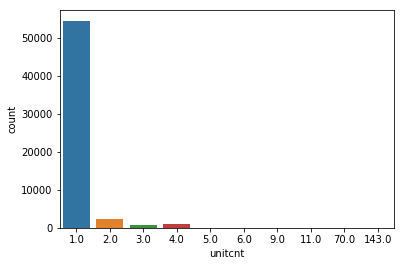

In [256]:
#--- some analysis on the column values ---

print(train_df['unitcnt'].unique())
print(train_df['unitcnt'].value_counts())
sns.countplot(x = 'unitcnt', data = train_df)

In [257]:
#--- Replace the missing values with the maximum occurences ---
train_df['unitcnt'] = train_df['unitcnt'].fillna(train_df['unitcnt'].mode()[0])

#--- cross check for missing values ---
print(train_df['unitcnt'].isnull().sum())

0


***5.3.2.c*** Column **`censustractandblock`**

Let us see the correlation between `censustractandblock` and `rawcensustractandblock`

In [258]:
print(train_df['censustractandblock'].corr(train_df['rawcensustractandblock']))

0.9998219419915649


In [259]:
print(train_df['censustractandblock'].nunique())
print(train_df['rawcensustractandblock'].nunique())

42398
42647


The correlation between these columns is VERY high (~1). So filling missing values MUST be in relation to column `rawcensustractandblock`

***5.3.2.d*** Column **`yearbuilt`**

Arranging the `yearbuilt`column in ascending order.

In [260]:
print(train_df['yearbuilt'].sort_values().unique())

[1885. 1886. 1887. 1888. 1890. 1891. 1892. 1893. 1894. 1895. 1896. 1897.
 1898. 1899. 1900. 1901. 1902. 1903. 1904. 1905. 1906. 1907. 1908. 1909.
 1910. 1911. 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920. 1921.
 1922. 1923. 1924. 1925. 1926. 1927. 1928. 1929. 1930. 1931. 1932. 1933.
 1934. 1935. 1936. 1937. 1938. 1939. 1940. 1941. 1942. 1943. 1944. 1945.
 1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957.
 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969.
 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981.
 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993.
 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005.
 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.   nan]


NAN has to be for 2016

In [261]:
train_df['yearbuilt'] = train_df['yearbuilt'].fillna(2016)

#--- cross check for missing values ---
print(train_df['yearbuilt'].isnull().sum())

0


***5.3.2.e***  ***Remaining columns***

The remaining columns can be safely assigned value '0', beacuse they all signify a presence of a particular ID or count.

In [262]:
#--- list of columns of type 'float' having missing values
#--- float_nan_col 

#--- list of columns of type 'float' after imputing missing values ---
float_filled_cols = ['regionidcity', 'regionidneighborhood', 'regionidzip', 'unitcnt', 'censustractandblock', 'yearbuilt']

count = 0
for i in float_nan_col:
    if i not in float_filled_cols:
        train_df[i] = train_df[i].fillna(0)
        count+=1
print(count)

36


In [263]:
#print(len(float_nan_col))
train_df['logerror']

0        0.0276
1       -0.1684
2       -0.0040
3        0.0218
4       -0.0050
5       -0.2705
6        0.0440
7        0.1638
8       -0.0030
9        0.0843
10       0.3825
11      -0.0161
12       0.0344
13       0.0816
14      -0.0450
15       0.0020
16       0.0440
17      -0.0419
18      -0.0020
19       0.0100
20      -0.0387
21       0.0218
22       0.0149
23       0.1151
24      -0.1696
25      -0.0440
26      -0.0747
27       0.0080
28       0.0010
29      -0.0534
          ...  
90245    0.0953
90246    0.0139
90247    0.2095
90248    0.0080
90249   -0.1312
90250    0.0421
90251    0.0658
90252    0.0030
90253   -0.0294
90254   -0.0111
90255    0.0070
90256    0.0218
90257    0.0526
90258    0.0889
90259    0.0178
90260    0.0237
90261    0.0431
90262   -0.2231
90263    0.1398
90264    0.0478
90265   -0.3769
90266   -0.0030
90267    0.0010
90268   -0.0151
90269    0.0344
90270   -0.0356
90271    0.0070
90272   -0.2679
90273    0.0602
90274    0.4207
Name: logerror, Length: 

In [264]:
x = train_df.iloc[1]
#print(x)

**CREATING NEW FEATURES**:

Let us create new features using the existing one in the dataframe

In [265]:
#--- how old is the house? ---
train_df['house_age'] = 2017 - train_df['yearbuilt']

#--- how many rooms are there? ---  
train_df['tot_rooms'] = train_df['bathroomcnt'] + train_df['bedroomcnt']

#--- does the house have A/C? ---
train_df['AC'] = np.where(train_df['airconditioningtypeid']>0, 1, 0)

#--- Does the house have a deck? ---
train_df['deck'] = np.where(train_df['decktypeid']>0, 1, 0)
train_df.drop('decktypeid', axis=1, inplace=True)

#--- does the house have a heating system? ---
train_df['heating_system'] = np.where(train_df['heatingorsystemtypeid']>0, 1, 0)

#--- does the house have a garage? ---
train_df['garage'] = np.where(train_df['garagecarcnt']>0, 1, 0)

#--- does the house come with a patio? ---
train_df['patio'] = np.where(train_df['yardbuildingsqft17']>0, 1, 0)

#--- does the house have a pool?
train_df['pooltypeid10'] = train_df.pooltypeid10.astype(np.int8)
train_df['pooltypeid7'] = train_df.pooltypeid7.astype(np.int8)
train_df['pooltypei2'] = train_df.pooltypeid2.astype(np.int8)
train_df['pool'] = train_df['pooltypeid10'] | train_df['pooltypeid7'] | train_df['pooltypeid2'] 

#--- does the house have all of these? -> spa/hot-tub/pool, A/C, heating system , garage, patio
train_df['exquisite'] = train_df['pool'] + train_df['patio'] + train_df['garage'] + train_df['heating_system'] + train_df['AC'] 

#--- Features based on location ---
train_df['x_loc'] = np.cos(train_df['latitude']) * np.cos(train_df['longitude'])
train_df['y_loc'] = np.cos(train_df['latitude']) * np.sin(train_df['longitude'])
train_df['z_loc'] = np.sin(train_df['latitude'])

print('DONE')

DONE


When do people usually buy houses?

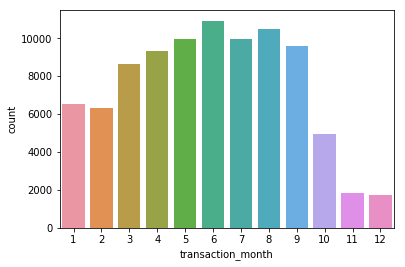

In [266]:
#train_df['transaction_year']
sns.countplot(x = 'transaction_month', data = train_df)

In [267]:
#--- create an additional feature called season ---
def seas(x):
    if 2 < x < 6:
        return 1        #--- Spring
    elif 5 < x < 9:
        return 2        #---Summer
    elif 8 < x < 12:
        return 3        #--- Fall (Autumn) 
    else:
        return 4        #--- Winter 

train_df['season'] = train_df['transaction_month'].apply(seas)

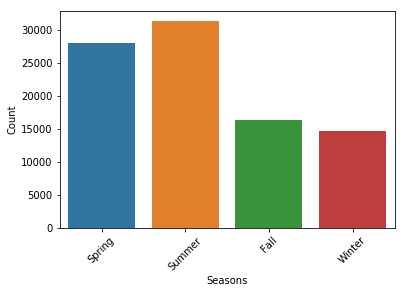

In [268]:
ax = sns.countplot(x = 'season', data = train_df)
ax.set(xlabel='Seasons', ylabel='Count')
season_list=['Spring','Summer','Fall','Winter']
plt.xticks(range(4), season_list, rotation=45)
plt.show()

Most of the house transactions are done in the Spring and Summer seasons.

Lets us see the distribution of the newly created exquisite features:

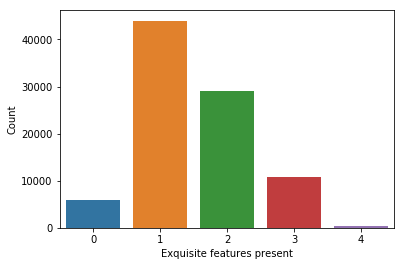

In [269]:
ax = sns.countplot(x = 'exquisite', data = train_df)
ax.set(xlabel='Exquisite features present', ylabel='Count')
plt.show()

Most of the houses have ATLEAST ONE of the mentioned exquisite features.

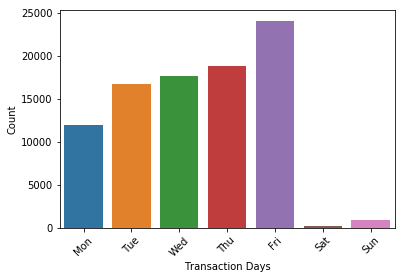

In [270]:
ax = sns.countplot(x = 'transaction_day', data = train_df)
ax.set(xlabel='Transaction Days', ylabel='Count')
days_list=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(range(len(days_list)), days_list, rotation=45)
plt.show()

**New feature**: Weekend/weekday transaction

Transactions are high during the weekdays. So we can create another categorical feature Weekdays/Weekends

In [271]:
#--- create an additional feature called weekday_trans ---
def weekday_transaction(x):
    if 4 < x <= 6:
        return 1        #--- Weekend
    else:
        return 2        #--- Weekday

train_df['weekday_trans'] = train_df['transaction_day'].apply(weekday_transaction)

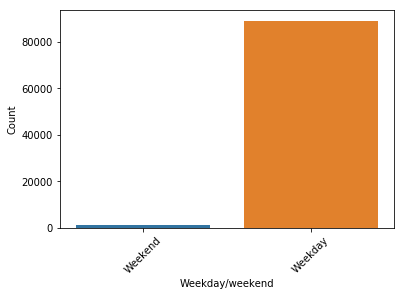

In [272]:
ax = sns.countplot(x = 'weekday_trans', data = train_df)
ax.set(xlabel='Weekday/weekend', ylabel='Count')
weekend_day_list=['Weekend', 'Weekday']
plt.xticks(range(len(weekend_day_list)), weekend_day_list, rotation=45)
plt.show()

**New features based on area** 

In [273]:
#--- living area ---
train_df['LivingArea'] = train_df['calculatedfinishedsquarefeet']/train_df['lotsizesquarefeet']
train_df['LivingArea_2'] = train_df['finishedsquarefeet12']/train_df['finishedsquarefeet15']

#--- Extra space available
train_df['ExtraSpace'] = train_df['lotsizesquarefeet'] - train_df['calculatedfinishedsquarefeet'] 
train_df['ExtraSpace-2'] = train_df['finishedsquarefeet15'] - train_df['finishedsquarefeet12'] 

**New features based on TAX**

In [274]:
#Ratio of tax of property over parcel
train_df['ValueRatio'] = train_df['taxvaluedollarcnt']/train_df['taxamount']

#TotalTaxScore
train_df['TaxScore'] = train_df['taxvaluedollarcnt']*train_df['taxamount']

**New features based on the address**

In [275]:
#Number of properties in the zip
zip_count = train_df['regionidzip'].value_counts().to_dict()
train_df['zip_count'] = train_df['regionidzip'].map(zip_count)

#Number of properties in the city
city_count = train_df['regionidcity'].value_counts().to_dict()
train_df['city_count'] = train_df['regionidcity'].map(city_count)

#Number of properties in the city
region_count = train_df['regionidcounty'].value_counts().to_dict()
train_df['county_count'] = train_df['regionidcounty'].map(region_count)

In [276]:
#--- Number of columns present in our dataframe now ---
a = train_df.columns.tolist()
print('Now there are {} columns in our dataframe'.format(len(a)))

Now there are 84 columns in our dataframe


**VISUALIZATIONS**

**1. Target Variable**

Obtaining the **absolute** error from the **`logerror`** column.

        val
0  1.027984
1  0.845016
2  0.996008
3  1.022039
4  0.995012


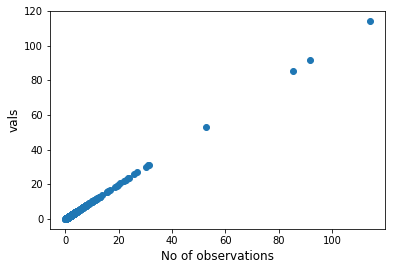

In [277]:
import math
p = pd.DataFrame()
p['val'] = np.exp(train_df['logerror'])
print(p.head())

plt.scatter(p['val'], p.val.values)
plt.xlabel('No of observations', fontsize=12)
plt.ylabel('vals', fontsize=12)
plt.show()

We can clearly see 4 distinct outliers. 

Let us see the statistics of the column.

In [278]:
#train_df['logerror']

In [279]:
print(p.describe())

                val
count  90275.000000
mean       1.032591
std        0.711017
min        0.010002
25%        0.975017
50%        1.006018
75%        1.039978
max      114.091414


Let us **remove** those outliers and visualize the plot and see the statistics again

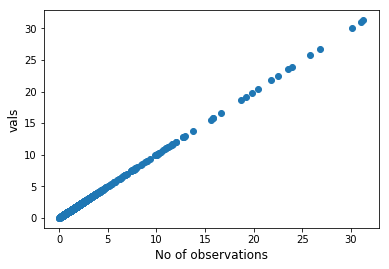

                val
count  90271.000000
mean       1.028826
std        0.405412
min        0.010002
25%        0.975017
50%        1.006018
75%        1.039978
max       31.280660


In [280]:
p = p[p['val'] < 40]

plt.scatter(p['val'], p.val.values)
plt.xlabel('No of observations', fontsize=12)
plt.ylabel('vals', fontsize=12)
plt.show()

print(p.describe())

The ***standard deviation*** and the ***maximum*** value have dropped by quite a large margin.

(array([2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00, 2.8000e+01,
        8.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        4.0000e+00, 2.0000e+00, 5.0000e+00, 3.0000e+00, 9.0000e+00,
        7.0000e+00, 1.5000e+01, 1.2000e+01, 2.0000e+01, 3.8000e+01,
        4.6000e+01, 6.8000e+01, 8.1000e+01, 1.1100e+02, 2.0800e+02,
        4.4400e+02, 9.4500e+02, 2.8000e+03, 1.6710e+04, 5.5202e+04,
        8.7500e+03, 2.2650e+03, 9.7900e+02, 5.1800e+02, 2.6200e+02,
        1.6600e+02, 1.0900e+02, 1.0900e+02, 7.1000e+01, 4.2000e+01,
        3.5000e+01, 2.7000e+01, 2.1000e+01, 2.3000e+01, 1.4000e+01,
        1.0000e+01, 6.0000e+00, 7.0000e+00, 6.0000e+00, 9.0000e+00,
        9.0000e+00, 7.0000e+00, 5.0000e+00, 4.00

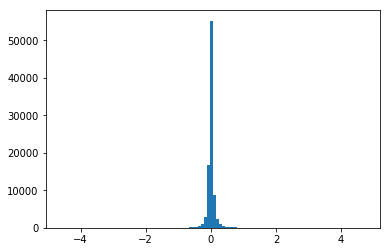

In [281]:
#plt.hist(np.log(train_df['trip_duration']+25), bins = 25)
plt.hist(train_df['logerror'], bins = 100)

**2. Correlations**

corr = train_df.corr()
fig, ax = plt.subplots(figsize=(20, 20))
ax.matshow(corr)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
plt.xticks(range(len(corr.columns)), corr.columns, fontsize = 15)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize = 15)

**MEMORY CONSUMPTION**

Let us look into the memory consumption of our dataframe and see if we can reduce it efficiently.

#--- Memory usage of entire dataframe ---
mem = train_df.memory_usage(index=True).sum()
print(mem/ 1024**2," MB")

In [282]:
#--- Memory usage of each column ---
#print(train_df.memory_usage()/ 1024**2)  #--- in MB ---

We can reduce memory for columns only having type **`int`** and type **`float`**, or columns having **numeric** values.

#--- List of columns that cannot be reduced in terms of memory size ---
count = 0
for col in train_df.columns:
    if train_df[col].dtype == object:
        count+=1
        print (col)
print('There are {} columns that cannot be reduced'.format(count))        

Reducing columns to type `int8` if possible

count = 0
for col in train_df.columns:
    if train_df[col].dtype != object:
        if ((train_df[col].max() < 255) & (train_df[col].min() > -255)):
            if((col != 'logerror')|(col != 'yearbuilt')|(col != 'xloc')|(col != 'yloc')|(col != 'zloc')):
                count+=1
                train_df[col] = train_df[col].astype(np.int8)
                #print (col)
print(count)                
                

#--- Memory usage of reduced dataframe ---
mem = train_df.memory_usage(index=True).sum()
print(mem/ 1024**2," MB")

We just reduced the dataframe size **from** **~57MB to ~35MB**

*Splendid*



#--- Reducing memory of `float64` type columns to `float32` type columns

count = 0
for col in train_df.columns:
    if train_df[col].dtype != object:
        if train_df[col].dtype == float:
            train_df[col] = train_df[col].astype(np.float32)
            count+=1
print('There were {} such columns'.format(count))

#--- Let us check the memory consumed again ---
mem = train_df.memory_usage(index=True).sum()
print(mem/ 1024**2," MB")

WOW!!! Now reduced **from ~35MB to ~24MB !!!!**

Let us see what we can do with columns of type **`int64`**.

#print(train_df.dtypes)
#print(train_df.dtypes.value_counts())
col_int64 = []
for col in train_df.columns:
    if train_df[col].dtype == 'int64':
        print(col)
        col_int64.append(col)
print(col_int64)

By checking the maximum and minimum values of these columns we can make sure which ones to convert to type **`int32`**.

for i in col_int64:
    print('{} - {} and {}'.format(i, max(train_df[i]), min(train_df[i])) )

Clearly these three columns can be converted to type **`int32`**:

`zip_count`, `city_count` and `county_count`

train_df['zip_count'] = train_df['zip_count'].astype(np.int32)
train_df['city_count'] = train_df['city_count'].astype(np.int32)
train_df['county_count'] = train_df['county_count'].astype(np.int32)

mem = train_df.memory_usage(index=True).sum()
print(mem/ 1024**2," MB")

In [285]:
train_df.to_csv('cleaned_2016.csv',index=False)